# Прогнозирование оттока клиентов оператора связи

## Описание проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг

Оператор предоставляет два основных типа услуг: 

- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.

- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);

- Выделенная линия технической поддержки (TechSupport);

- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);

- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:
- `contract_new.csv` — информация о договоре;
- `personal_new.csv` — персональные данные клиента;
- `internet_new.csv` — информация об интернет-услугах;
- `phone_new.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Данные также находятся в тренажёре, в папке `/datasets/`.

Информация о договорах актуальна на 1 февраля 2020.

## План выполнения проекта

**Исследование данных:**

- Визуальный осмотр: Изучение структуры данных, просмотр первых строк, ознакомление с признаками и их значением.
- Вывод статистической информации: Анализ основных статистических метрик для числовых признаков, таких как среднее значение, стандартное отклонение, минимум, максимум и квартили.
- Поиск пропусков и проверка типов данных: Проверка наличия пропущенных значений в данных и проверка соответствия типов данных признакам.

**Подготовка данных:**

- Объединение таблиц: Если данные представлены в нескольких таблицах, их объединение по общим идентификаторам или ключевым признакам.
- Предобработка пропусков и дубликатов: Обработка пропущенных значений, например, заполнение средними или медианными значениями, и удаление дубликатов, если они есть.
- Изменение типов данных: Преобразование типов данных признаков, если необходимо, для соответствия требованиям модели.
- Подготовка признаков для модели: Добавление новых синтетических признаков, удаление малоинформативных признаков и преобразование признаков в удобный формат для моделирования.

**Подбор моделей:**

- Обучение и сравнение нескольких моделей на кросс-валидации: Обучение различных моделей машинного обучения на обучающей выборке и сравнение их производительности на кросс-валидации с использованием подходящих метрик оценки.
- Подбор гиперпараметров и признакового пространства на кросс-валидации: Оптимизация гиперпараметров моделей и выбор наиболее информативных признаков, используя кросс-валидацию для достижения лучшей производительности модели.

**Тестирование:**

- Проверка на тестовой выборке: Оценка производительности выбранной модели на отложенной тестовой выборке для оценки ее способности обобщения и прогнозирования оттока клиентов.

**Итог:** анализ результатов, сделанных выводов и предоставление рекомендаций на основе прогнозов оттока клиентов, полученных от выбранной модели.

Вопросов нет.

## Первичный анализ данных

In [1]:
!pip install phik

In [2]:
import time
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')
random_state=140823

In [3]:
from tqdm import tqdm
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, classification_report

Для обеспечения гибкости и возможности смены устройства, я создал отдельную переменную, которая содержит путь к файлу. Это позволит изменять путь, учитывая наличие исходных файлов на конкретном устройстве. Я настроил связку чтения данных таким образом, чтобы файлы могли быть прочитаны как в тренажере, так и в локальной тетради, путем ручного указания пути к файлу.

In [4]:
file_path = 'D:/DS/datasets/'

try:
    contract = pd.read_csv(file_path+'contract_new.csv')
except:
    contract = pd.read_csv('/datasets/contract_new.csv')
    
try:
    personal = pd.read_csv(file_path+'personal_new.csv')
except:
    personal = pd.read_csv('/datasets/personal_new.csv')
    
try:
    internet = pd.read_csv(file_path+'internet_new.csv')
except:
    internet = pd.read_csv('/datasets/internet_new.csv')
    
try:
    phone = pd.read_csv(file_path+'phone_new.csv')
except:
    phone = pd.read_csv('/datasets/phone_new.csv')

## Предварительный анализ данных

Выполним обзор таблиц **`contract`**, **`internet`**, **`personal`**, **`phone`**

In [5]:
data_frames = [contract, personal, internet, phone]
labels = ['CONTRACT', 'PERSONAL', 'INTERNET', 'PHONE']

for df, label in zip(data_frames, labels):
    print('*' * 25, label, '*' * 25)
    print()
    display(df.head())
    print('-' * 25, 'INFO', '-' * 25)
    print()
    print(df.info())
    print()
    print('-' * 25, 'NAN', '-' * 25)
    print()
    print(df.isna().sum())
    print()
    print('-' * 25, 'DUPLICATED', '-' * 25)
    print(df.duplicated().sum())
    print()
    print('-' * 25, 'UNIQUE VALUES', '-' * 25)
    for column in df.columns:
        print(column)
        print(df[column].unique())
        print('-' * 25)
    print()

************************* CONTRACT *************************



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

------------------------- NAN -------------------------

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

------------------------- DUPLICATED ----------------------

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

------------------------- NAN -------------------------

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

------------------------- DUPLICATED -------------------------
0

------------------------- UNIQUE VALUES -------------------------
customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
-------------------------
gender
['Female' 'Male']
-------------------------
Senior

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

------------------------- NAN -------------------------

customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

------------------------- DUPLICATED -------------------------
0

---------------

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


------------------------- INFO -------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

------------------------- NAN -------------------------

customerID       0
MultipleLines    0
dtype: int64

------------------------- DUPLICATED -------------------------
0

------------------------- UNIQUE VALUES -------------------------
customerID
['5575-GNVDE' '3668-QPYBK' '9237-HQITU' ... '2234-XADUH' '8361-LTMKD'
 '3186-AJIEK']
-------------------------
MultipleLines
['No' 'Yes']
-------------------------



Сделаем замену наименований столбцов на нижний регистр с раздением нижней чертой, для корректной работы с признаками. Также добавим краткое описание данных

In [6]:
new_columns = []
for item in list(contract.columns):
    item = item.lower()
    new_columns.append(item)

new_columns = ['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method', 'monthly_charges',\
               'total_charges']
contract.columns = new_columns
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


Описание данных из таблицы `contract`:
- customerID — ID абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

In [7]:
new_columns = []
for item in list(internet.columns):
    item = item.lower()
    new_columns.append(item)

new_columns = ['customer_id', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support',\
               'streaming_tv', 'streaming_movies']
internet.columns = new_columns
internet.head()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Описание данных из таблицы `internet`:
- customerID — ID пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

In [8]:
new_columns = []
for item in list(personal.columns):
    item = item.lower()
    new_columns.append(item)

new_columns = ['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents']
personal.columns = new_columns
personal.head()

,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Описание данных из таблицы `personal`:
- customerID — ID пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

In [9]:
new_columns = []
for item in list(phone.columns):
    item = item.lower()
    new_columns.append(item)

new_columns = ['customer_id', 'multiple_lines']
phone.columns = new_columns
phone.head()

,customer_id,multiple_lines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


Описание данных из таблицы `phone`:
- customerID — ID пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

По результатам первичного анализа данных можно сделать следующие выводы:

- Датасет представлен 4 таблицами разных размерностей, содержащих информацию о клиентах и используемых ими услугах.
- Из таблицы `contract` видно, что клиенты делятся на тех кто остается в компании и тех, кто ее покинул.
- Необходимо проверить наличие закономерностей - следует провести исследовательский анализ данных по группам клиентов.
- Во всех таблицах отсутствуют пропуски и дубликаты, что упрощает предобработку данных, но при этом некоторые признаки имеют некорректный тип данных и их необходимо преобразовать.

Основной упор следует сделать на таблицу `contract`. Необходимо привести даты к типу данных "время", сгенерировать целевой признак и дополнительный признак на основе информации из таблицы `contract`, а затем удалить временные признаки. Для численных признаков следует изменить тип данных и применить метод `describe` для получения статистической информации.

После этого таблицы можно объединить и применить бинарную маску к бинарным признакам. После объединения таблиц могут возникнуть пропущенные значения, которые следует заполнить.

Исследовательский анализ данных следует проводить после объединения таблиц, так как после этой операции будет доступна полная информация о персональных данных клиентов и используемых ими услугах.

## Предобработка и исследовательский анализ

Выявим неявные дубликаты, тем самым проверив данные на уникальность

In [10]:
unique_customers = contract['customer_id'].nunique()
data_objects = contract.shape[0]

print(f'Количество уникальных клиентов = {unique_customers}')
print(f'Количество объектов в данных   = {data_objects}')

Количество уникальных клиентов = 7043
Количество объектов в данных   = 7043


Все клиенты в таблице уникальны. Столбец `total_charges` приведем к числовому типу. При выполнении команды появляется ошибка, что в некоторых строках значения принимают вид ' '. Проверим эти объекты.

In [11]:
contract[contract['total_charges'] == ' ']

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Можем увидеть, что это новые клиенты у которые есть длительная подписка на момент выгрузки данных. Заполним эти пустые значения данными из `monthly_charges` - так как клиент только подключился к сервису, а также изменим тип признака с `object` на `float64`.

In [12]:
contract.loc[contract['total_charges'] == ' ', 'total_charges'] = contract['monthly_charges']
contract['total_charges'] = contract['total_charges'].astype(float)

In [13]:
print(contract['total_charges'].dtype)

float64


Создадим целевой признак на основе признака `end_date`: 0 - клиент остался, 1- клиент ушел

In [14]:
contract['left'] = contract['end_date'].apply(lambda date: 0 if date == 'No' else 1)
contract.head()

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,left
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0


Изменим тип данных временных столбцов, предварительно заменив строковое значение No на дату выгрузки данных в признаке `end_date`

In [15]:
contract['end_date'] = contract['end_date'].replace('No', '2020-02-01')

for i in ['begin_date', 'end_date']:
    contract[i] = pd.to_datetime(contract[i])

contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           7043 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   left               7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 495.3+ KB


Создадим новый признак на основе времени: количество дней "жизни" клиента. Далее мы удалим временные признаки, для того чтобы исключить корреляцию между ними

In [16]:
contract['live_days'] = (contract['end_date'] - contract['begin_date']).dt.days
contract = contract.drop(['begin_date', 'end_date'], axis=1)
contract.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,left,live_days
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


Приступим к изучению статистики столбцов `monthly_charges` и `total_charges`

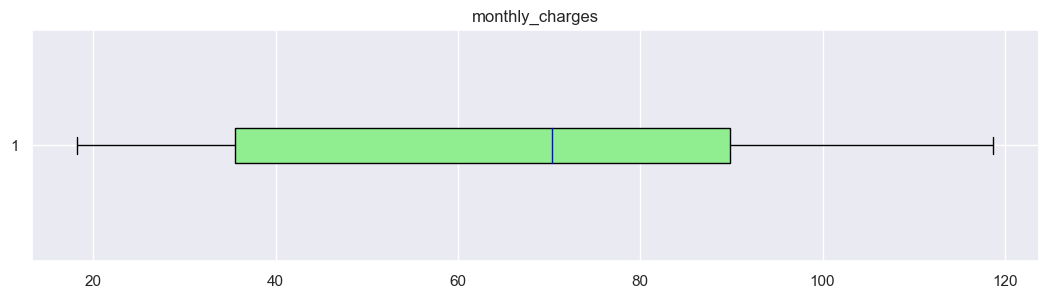

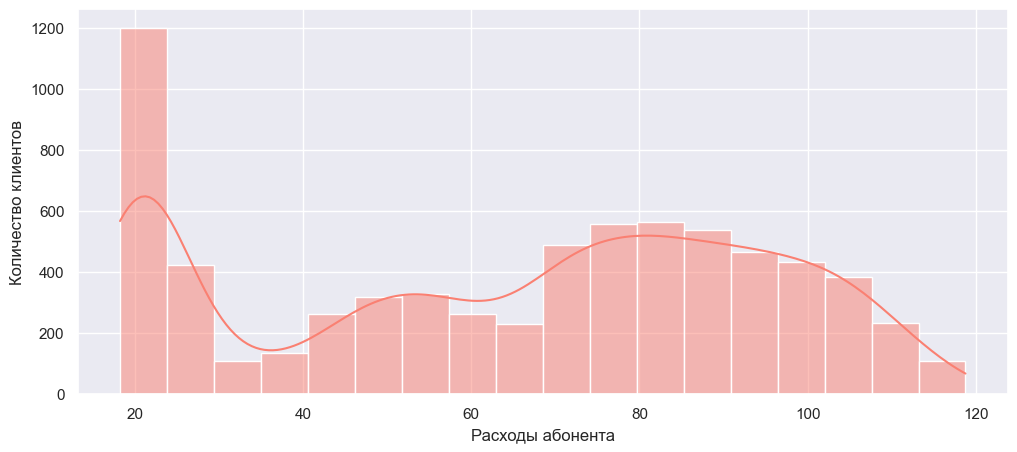

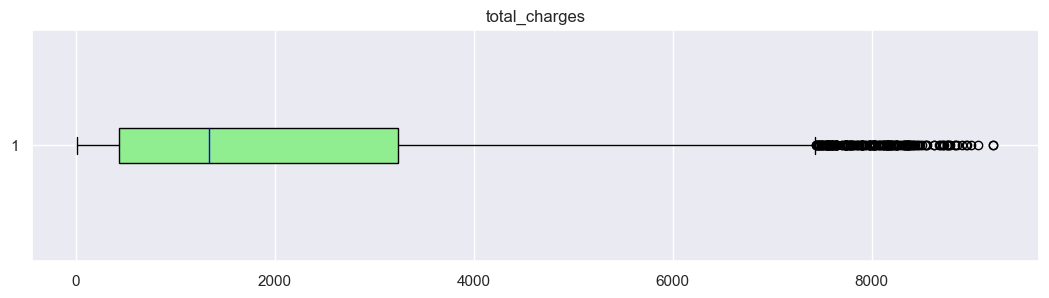

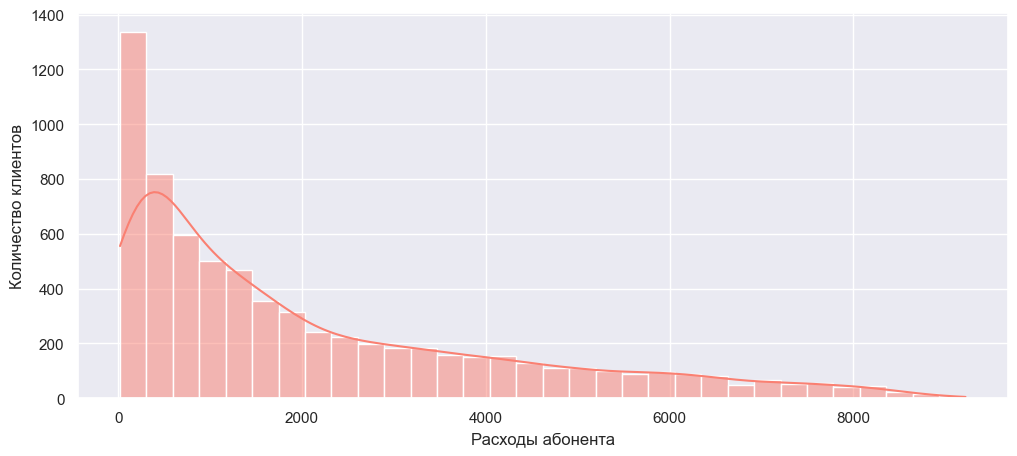

In [17]:
for i in ('monthly_charges','total_charges'):
    print()
    plt.figure(figsize=(13,3))
    plt.boxplot(contract[i], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='blue'))
    plt.title(i)
    print()
    plt.figure(figsize=(12,5))
    sns.histplot(contract[i], kde=True, color='salmon')
    plt.grid(True)
    plt.xlabel('Расходы абонента')
    plt.ylabel('Количество клиентов')
    print()
    plt.show()

Из графиков можно сделать следующие выводы:

- Первый график, отображающий месячные траты, показывает двойное (биноминальное) распределение. На первый взгляд может показаться, что есть выбросы в левой области, но на самом деле это указывает на то, что клиенты разделяются на две категории: бюджетные и остальные. Это разделение основано не только на сумме платежа, а больше на предпочтениях по использованию конкретных сервисов.


- Второй график, отображающий общие платежи, имеет стандартное распределение Гаусса со смещением вправо. Это соответствует данным первого графика, где большинство клиентов предпочитают бюджетные тарифы и дополнительные сервисы. Важно отметить, что в числовых признаках не было обнаружено выбросов или аномалий.

Объединим таблицы и выполним исследовательский анализ остальных данных. Пропуски после объяедениения таблиц заполним значением `notused` - пропуск означает отсутствие услуги

In [18]:
df_full = contract.merge(personal, on='customer_id', how='left')\
                  .merge(internet, on='customer_id', how='left')\
                  .merge(phone, on='customer_id', how='left').fillna('notused')
df_full.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,left,live_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,notused
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,notused
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


Наложим бинарную маску на признаки с бинарными значениями Yes No

In [19]:
for i in df_full.columns:
    if (df_full[i].unique()[0] == 'Yes' or df_full[i].unique()[0] == 'No'):
        df_full[i] = df_full[i].map({'Yes':1,'No':0,'notused':0})
df_full.head()

,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,left,live_days,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,7590-VHVEG,Month-to-month,1,Electronic check,29.85,31.04,0,31,Female,0,1,0,DSL,0,1,0,0,0,0,notused
1,5575-GNVDE,One year,0,Mailed check,56.95,2071.84,0,1036,Male,0,0,0,DSL,1,0,1,0,0,0,No
2,3668-QPYBK,Month-to-month,1,Mailed check,53.85,226.17,0,123,Male,0,0,0,DSL,1,1,0,0,0,0,No
3,7795-CFOCW,One year,0,Bank transfer (automatic),42.30,1960.60,0,1371,Male,0,0,0,DSL,1,0,1,1,0,0,notused
4,9237-HQITU,Month-to-month,1,Electronic check,70.70,353.50,0,153,Female,0,0,0,Fiber optic,0,0,0,0,0,0,No


Выполним исследовательский анализ данных по группам ушедших и текущих клиентов. Первый ряд графиков будет для числовых признаков, второй - для категориальных

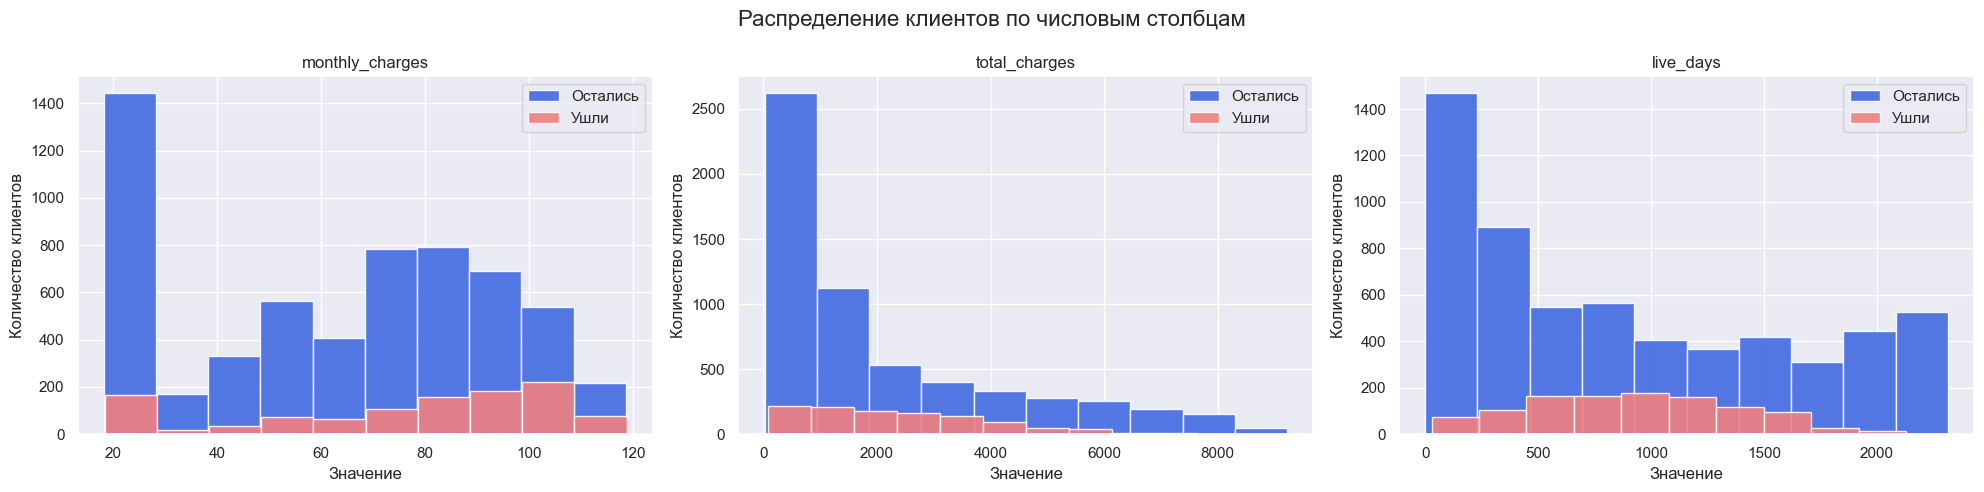

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig.suptitle("Распределение клиентов по числовым столбцам", fontsize=16)
axes = axs.ravel()

for i, col in enumerate(['monthly_charges', 'total_charges', 'live_days']):
    ax = axes[i]
    
    df_full[df_full['left'] == 0][col].plot(kind='hist', ax=ax, alpha=.9, color='royalblue')
    df_full[df_full['left'] == 1][col].plot(kind='hist', ax=ax, alpha=.9, color='lightcoral')
    
    ax.legend(['Остались', 'Ушли'])
    ax.set_title(col, fontsize=12)
    ax.set_ylabel('Количество клиентов')
    ax.set_xlabel('Значение')

plt.tight_layout()
plt.show()

**Вывод по численным графикам:**

- Большему влиянию на уход подвержены клиенты с высоким ежемесячным платежом, преимущественно те, у кого есть ежемесячная подписка. Это может указывать на то, что клиенты, которые тратят больше денег каждый месяц, имеют больше оснований для ухода из компании.


- У большинства оставшихся клиентов ежемесячный платеж минимальный, в то время как у ушедших клиентов ежемесячный платеж был достаточно высоким, находящимся в диапазоне 70-110 у.е. Это может указывать на то, что клиенты, которые платят больше каждый месяц, склонны к уходу.


- У большинства клиентов всех категорий суммарные траты на момент выгрузки данных небольшие. Это может указывать на то, что большинство клиентов не тратят значительные суммы денег на услуги компании в целом.


- С течением времени уровень ухода клиентов снижается, а к концу периода наблюдения уровень привлечения новых клиентов немного возрастает. Это может говорить о росте лояльности компании к клиентам и улучшении ее привлекательности для новых пользователей.

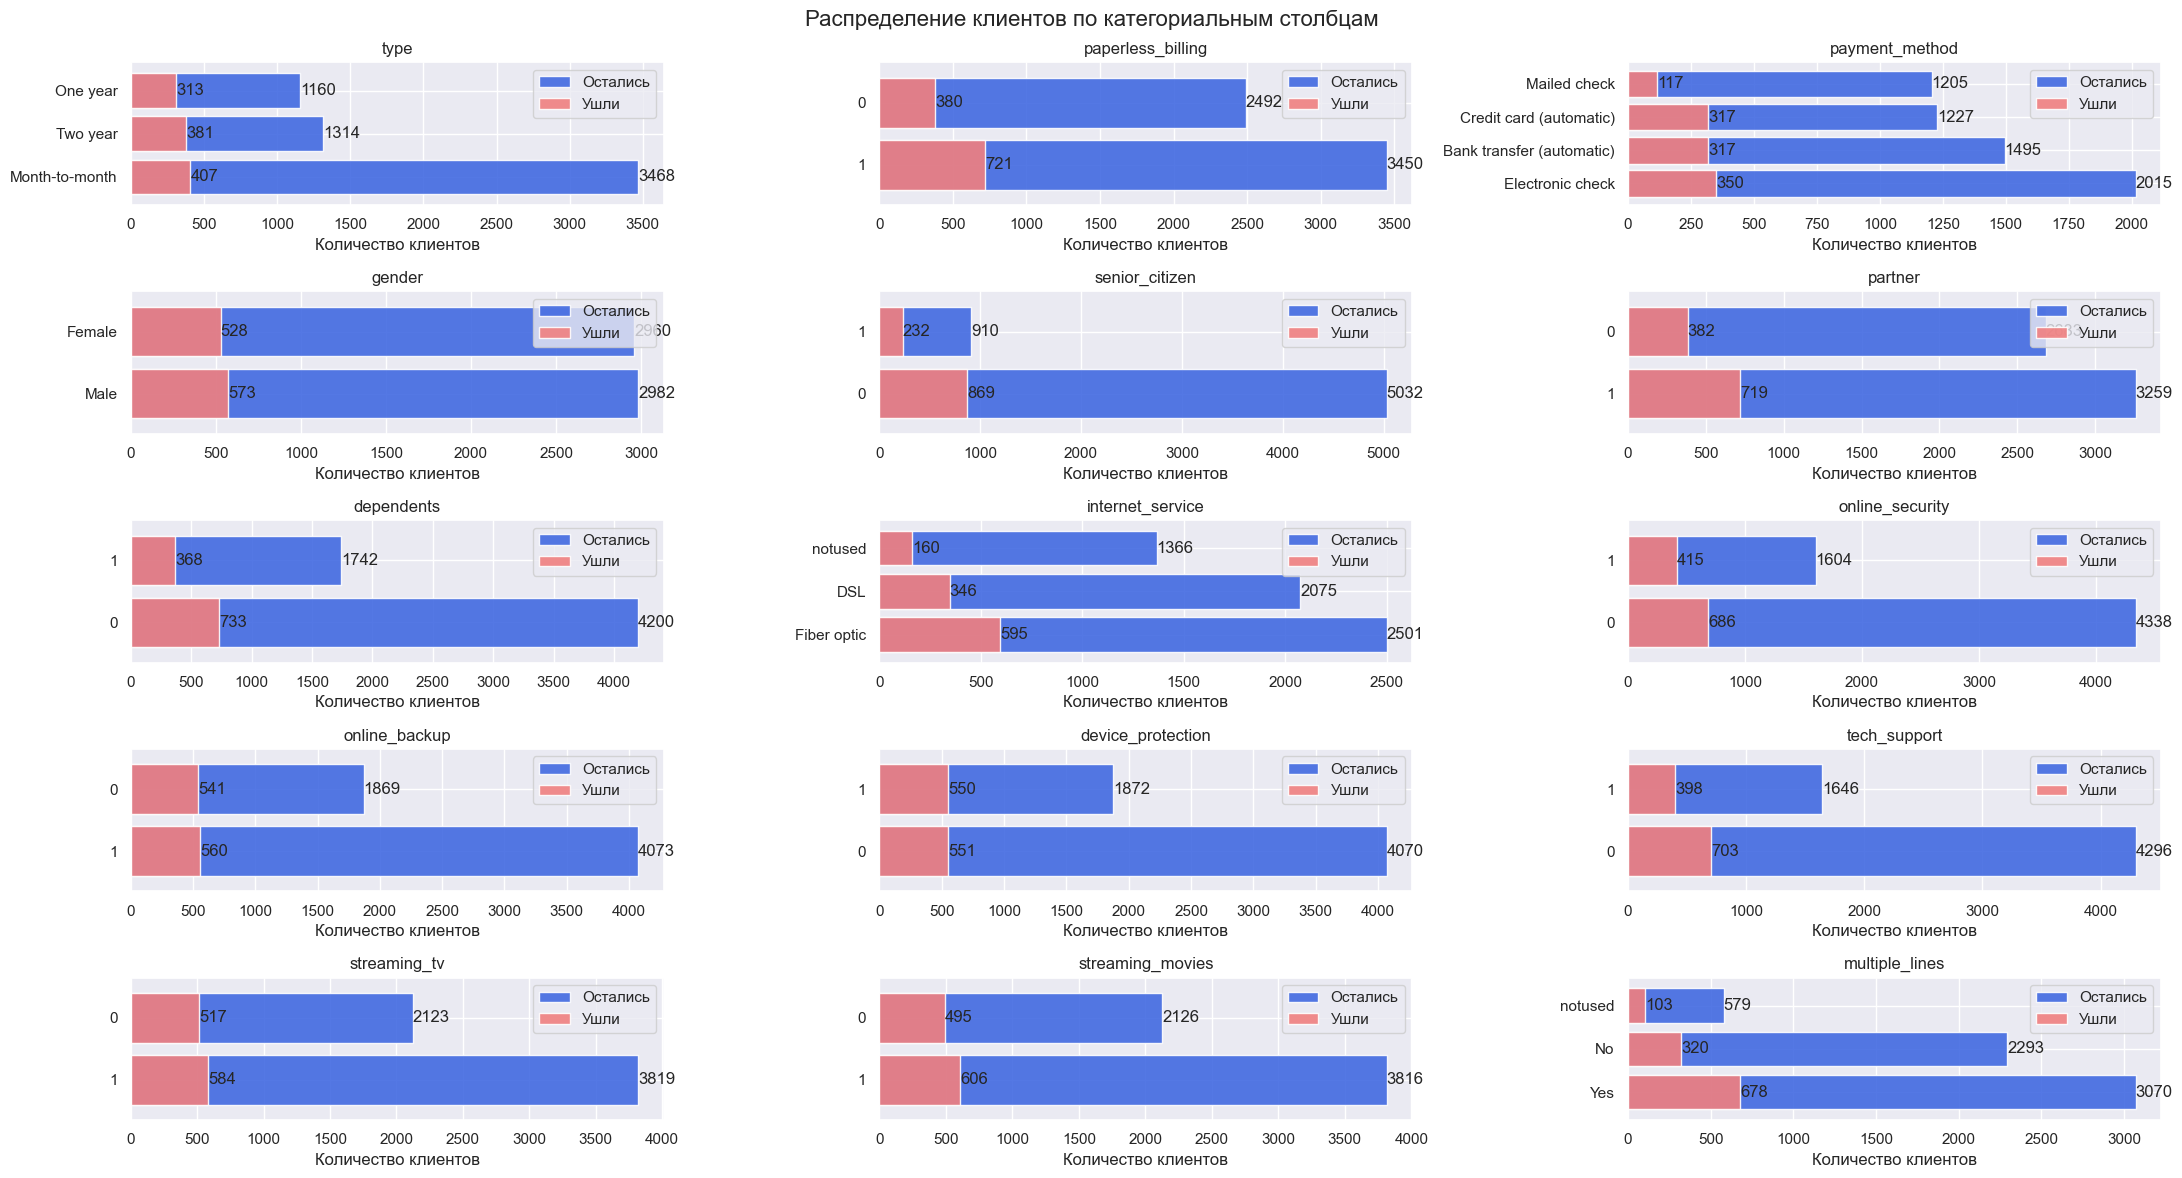

In [21]:
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(22, 12))
fig.suptitle("Распределение клиентов по категориальным столбцам", fontsize=16)
axes = axs.ravel()

for i, col in enumerate(df_full.drop(['customer_id','left', 'monthly_charges', 'total_charges', 'live_days'], axis=1).columns.to_list()):
    ax = axes[i]
    
    live_counts = df_full[df_full['left'] == 0][col].value_counts()
    left_counts = df_full[df_full['left'] == 1][col].value_counts()
    
    total_counts = live_counts + left_counts
    
    live_counts.plot(kind='barh', width=0.8, alpha=.9, ax=ax, label='Остались', color='royalblue')
    left_counts.plot(kind='barh', width=0.8, alpha=.9, ax=ax, label='Ушли', color='lightcoral')
    
    ax.bar_label(ax.containers[0], labels=live_counts.values)
    ax.bar_label(ax.containers[1], labels=left_counts.values)
    
    ax.legend()
    ax.set_title(col, fontsize=12)
    ax.set_ylabel('')
    ax.set_xlabel('Количество клиентов')

plt.tight_layout()
plt.show()

**Вывод по категориальным графикам:**

- Большинство клиентов, которые решили уйти, были подключены к тарифу с ежемесячной оплатой. Они также предпочитали получать счета в электронном виде и оплачивать услуги автоматически электронным способом, например, через приложение или по банковской карте. Это может указывать на то, что клиенты, предпочитающие более гибкие тарифные планы и удобные способы оплаты, более склонны к уходу.


- Большая часть людей, которая уходит - это клиенты, которые не относятся к пожилым людям. Это может указывать на то, что компания имеет проблемы с удержанием более молодых клиентов и может потребоваться целевая стратегия, чтобы привлечь и удержать эту группу пользователей.


- Среди всех клиентов примерно равное количество разных полов, и большинство клиентов имеют партнера, но также у большинства нет детей. Можно предположить, что семейное положение и наличие детей, вероятно, оказывают влияние на решение клиентов остаться или уйти.


- По остальным услугам - большинство клиентов пользуется дополнительными услугами. Это может свидетельствовать о том, что большинство клиентов предпочитают дополнительные услуги и выражают интерес к дополнительным функциям или услугам, предлагаемым компанией.

Построим график корреляции признаков

interval columns not set, guessing: ['paperless_billing', 'monthly_charges', 'total_charges', 'left', 'live_days', 'senior_citizen', 'partner', 'dependents', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']



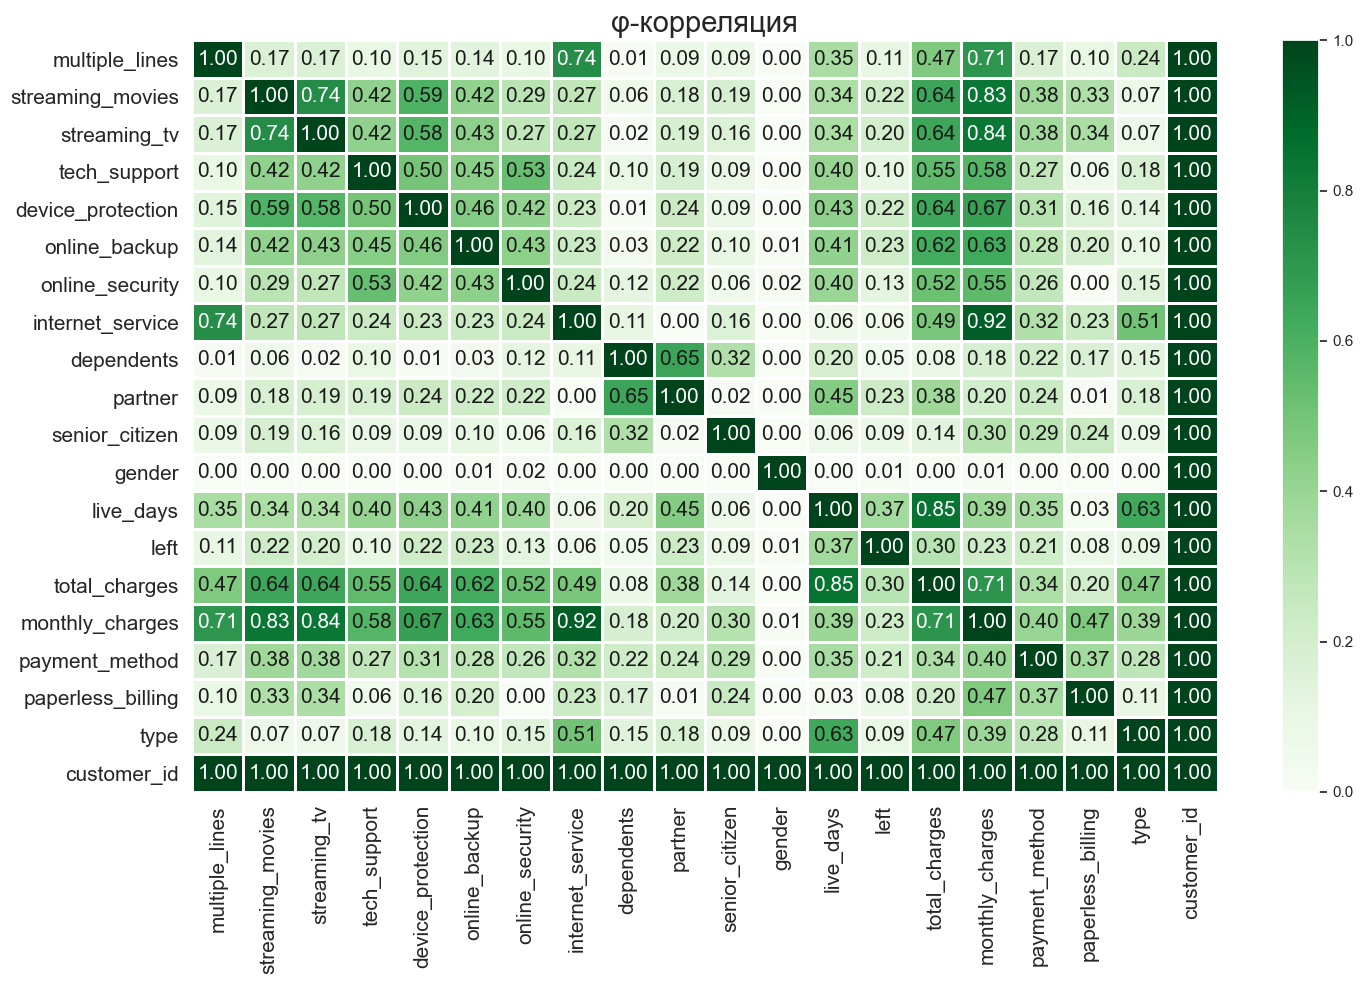

In [22]:
corr_matrix = df_full.phik_matrix()
print()
plot_correlation_matrix(corr_matrix.values, 
                        x_labels=corr_matrix.columns, 
                        y_labels=corr_matrix.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title="\u03C6-корреляция", 
                        fontsize_factor=1.5, 
                        figsize=(15, 10))
plt.tight_layout()
plt.show()

На графике мы наблюдаем сильную корреляцию между признаком `monthly_charges` и четыремя другими признаками. Вместо удаления этих признаков, мы планируем проверить их важность на лучшей модели в дальнейшем. Однако, для текущего анализа, мы решили удалить признак `customer_id`, поскольку он состоит полностью из уникальных значений. Также, мы решили удалить признак `total_charges`, так как он имеет высокую корреляцию с другими истинно-числовыми признаками. Это решение будет способствовать устранению мультиколлинеарности и улучшению производительности модели при дальнейшем анализе.

In [23]:
df_full = df_full.drop(['customer_id','total_charges'], axis=1)
df_full.head(1)
print(f'Размер итоговой таблицы {df_full.shape}')

Размер итоговой таблицы (7043, 18)


Проверим баланс классов

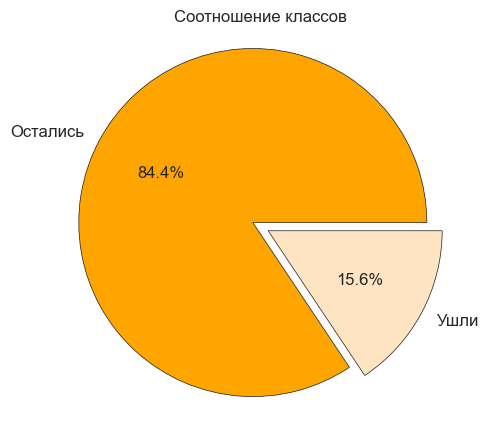

----------------------------------------
Отношение классов: 5942:1101
                   5.4:1


In [24]:
df_full.left.value_counts().plot(
    kind='pie',
    title='Соотношение классов',
    ylabel='',
    labels=['Остались', 'Ушли'],
    autopct='%.1f%%',
    explode=[0.05, 0.05],
    figsize=(5, 5),
    fontsize=12,
    wedgeprops={'linewidth': 0.5, 'edgecolor': 'k'},
    colors=['orange', 'bisque']
)
plt.axis('equal')
plt.show()

print('-' * 40)
print(f'Отношение классов: {df_full.left.value_counts()[0]}:{df_full.left.value_counts()[1]}')
print(' ' * 18,f'{df_full.left.value_counts()[0]/df_full.left.value_counts()[1]:.1f}:1')

Баланс классов незначительный - для обучения линейных моделей нужно будет выполнить выравнивание весов методом `class_weight`.

**Вывод по исследовательскому анализу:**

Большая часть ушедших клиентов - это клиенты не пожилого возраста. Эти клиенты имели достаточно высокий ежемесячный платеж и выбирали дополнительные услуги. Вероятно, их уход связан с недостаточной информированностью о всех услугах компании и их стоимости, а также возможным навязыванием или неожиданным повышением цен без предварительного уведомления клиентов. Причин может быть множество, но общая тенденция указывает на снижение уровня лояльности клиентов к компании. Интересно отметить, что к концу периода сбора данных компания изменила свою стратегию, что привело к снижению количества ушедших клиентов и одновременному росту числа новых клиентов.

Оставшиеся клиенты в равной степени предпочитают различные типы подписок, подключены к тарифу с ежемесячной оплатой, который характеризуется низким ежемесячным платежом, что приводит к низким суммарным тратам. Большая часть этих клиентов состоит из семейных пар, без детей.

**Выводы по предобработке данных:**

1. Скорректированы типы данных для соответствующих признаков, чтобы обеспечить их правильное представление и использование в дальнейшем анализе.

1. Были сгенерированы целевой признак и дополнительные признаки, которые могут быть полезными для анализа и моделирования.

1. Таблицы были объединены, устранены образовавшиеся пропуски данных, чтобы обеспечить полноту и целостность данных.

1. Проведен исследовательский анализ данных на основе целевого признака, что позволило получить представление о распределении классов и основных характеристиках данных.

1. Некоторые признаки были закодированы с использованием бинарной маски для удобства кодирования остальных признаков и с целью экономии памяти при проведении кросс-валидации и обучении моделей.

1. Были удалены неинформативные объекты и сильноскоррелированные признаки, чтобы улучшить качество данных и уменьшить размерность задачи.

Результатом этих шагов являются подготовленные данные для дальнейшего обучения модели.

## Подготовка к обучению

In [25]:
onehot_encoder = OneHotEncoder(drop='first')

сategorical_col = df_full.select_dtypes(include=['object']).columns

for column in сategorical_col:
    if column != 'customer_id':
        encoded_df = onehot_encoder.fit_transform(df_full[[column]])

        encoded_col = [f'{column}_{category}' for category in onehot_encoder.categories_[0]]
        df_full = df_full.drop(column, axis=1)

        for i, enc_col in enumerate(encoded_col):
            if i < encoded_df.shape[1]:
                df_full[enc_col] = encoded_df[:, i].toarray()
df_full.head()

,paperless_billing,monthly_charges,left,live_days,senior_citizen,partner,dependents,online_security,online_backup,device_protection,...,type_Month-to-month,type_One year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,gender_Female,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
0,1,29.85,0,31,0,1,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,56.95,0,1036,0,0,0,1,0,1,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1,53.85,0,123,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0,42.30,0,1371,0,0,0,1,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1,70.70,0,153,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Изменим тип данных `object` на `category` для бустингов, разделим данные на выборки и таргет

In [26]:
for col in df_full.select_dtypes('object').columns.to_list():
    df_full[col] = df_full[col].astype('category')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   paperless_billing                         7043 non-null   int64  
 1   monthly_charges                           7043 non-null   float64
 2   left                                      7043 non-null   int64  
 3   live_days                                 7043 non-null   int64  
 4   senior_citizen                            7043 non-null   int64  
 5   partner                                   7043 non-null   int64  
 6   dependents                                7043 non-null   int64  
 7   online_security                           7043 non-null   int64  
 8   online_backup                             7043 non-null   int64  
 9   device_protection                         7043 non-null   int64  
 10  tech_support                        

In [27]:
X, X_test, y, y_test = train_test_split(
    df_full.drop('left', axis=1),
    df_full['left'],
    test_size=0.25,
    stratify=df_full['left'],
    random_state=140823
)

print(f'Размер трейна: {X.shape}  {y.shape}')
print(f'Размер теста:  {X_test.shape}  {y_test.shape}')
print('-' * 35)
print('Распределение классов в таргете на трейне:')
print(f'{np.bincount(y)} --> [{(np.bincount(y)[1] / np.bincount(y)[0]).round(2)}:1]')
print('Распределение классов в таргете на тесте:')
print(f'{np.bincount(y_test)} --> [{(np.bincount(y_test)[1] / np.bincount(y_test)[0]).round(2)}:1]')

Размер трейна: (5282, 22)  (5282,)
Размер теста:  (1761, 22)  (1761,)
-----------------------------------
Распределение классов в таргете на трейне:
[4456  826] --> [0.19:1]
Распределение классов в таргете на тесте:
[1486  275] --> [0.19:1]


Целевая переменная `left` была стратифицирована. Это означает то, что классы были равномерно распределены между тренировочным и тестовым наборами данных. Это важно для обеспечения сбалансированности и предотвращения смещения при обучении модели. При обучении модели будет использована кросс-валидация, что поможет более надежно оценить ее производительность.

Также будет применен трансформер для кодирования признаков. Это важно для избежания утечки данных при трансформации выборок. Трансформер будет применен отдельно к каждому набору данных (тренировочному и тестовому), чтобы гарантировать, что информация о признаках не будет использоваться из тестового набора данных при обучении модели.

In [28]:
#КОД ТИМЛИДА

display(X.head(5))
X.info()

,paperless_billing,monthly_charges,live_days,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,...,type_Month-to-month,type_One year,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,gender_Female,internet_service_DSL,internet_service_Fiber optic,multiple_lines_No,multiple_lines_Yes
1058,1,89.55,153,0,1,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5182,0,24.95,365,0,0,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2408,0,20.85,1371,0,1,1,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6276,0,20.35,457,0,1,1,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6674,0,23.50,215,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1058 to 2883
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   paperless_billing                         5282 non-null   int64  
 1   monthly_charges                           5282 non-null   float64
 2   live_days                                 5282 non-null   int64  
 3   senior_citizen                            5282 non-null   int64  
 4   partner                                   5282 non-null   int64  
 5   dependents                                5282 non-null   int64  
 6   online_security                           5282 non-null   int64  
 7   online_backup                             5282 non-null   int64  
 8   device_protection                         5282 non-null   int64  
 9   tech_support                              5282 non-null   int64  
 10  streaming_tv                     

In [29]:
cat = X.select_dtypes("category").columns.to_list()
num = ['monthly_charges', 'live_days']

col_trans_lin = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat),
        ('scaler', StandardScaler(), num)
    ],
    remainder='passthrough'
)

col_trans_forest = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False), cat)
    ],
    remainder='passthrough'
)

Определим функцию, которая принимает модель с ее параметрами в качестве входных данных и возвращает метрику оценки модели, лучшие параметры и лучшую модель

In [30]:
def classifier_cv(model, params):
    classifier = RandomizedSearchCV(
        model, 
        params, 
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=140823),
        scoring='roc_auc',
        n_jobs=-1,
        verbose=10,
        random_state=140823
    )
    classifier.fit(X, y)
    
    auc_cv = round(classifier.best_score_, 3)
    best_params = classifier.best_params_
    best_model = classifier.best_estimator_
    
    print('-' * 23)
    print('Оптимизация завершена успешно')
    print('-' * 23)
    return auc_cv, best_params, best_model

## Обучение

In [31]:
pipe_lgbm = Pipeline([
    ('lgbm', LGBMClassifier(objective='binary',
                            class_weight='balanced',
                            random_state=140823)),
])
params_lgbm = {
    'lgbm__n_estimators': range(100, 1001, 100),
    'lgbm__max_depth': range(5, 26, 5),
    'lgbm__learning_rate': [0.01, 0.1, 0.5],
    'lgbm__num_leaves': range(10, 51, 5)
}

start_time = time.time()
lgbm_auc_cv, lgbm_best_params, lgbm_best_model = classifier_cv(
    pipe_lgbm, 
    params_lgbm
)

end_time = time.time()

execution_time = end_time - start_time

print("Прошло времени: {:.2f} секунд".format(execution_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Оптимизация завершена успешно
-----------------------
Прошло времени: 44.31 секунд


In [32]:
pipe_rf = Pipeline([
    ('transformer_forest', col_trans_forest),
    ('rf', RandomForestClassifier(random_state=140823))
    
])
params_rf = {
    'rf__n_estimators':range(100,1001,100),
    'rf__max_depth':range(5,26,5),
    'rf__min_samples_split':range(2,7),
    'rf__min_samples_leaf':range(2,7),
    'rf__criterion':['gini','entropy','log_loss']
}

start_time = time.time()
rf_auc_cv, rf_best_params, rf_best_model = classifier_cv(
    pipe_rf, 
    params_rf
)

end_time = time.time()

execution_time = end_time - start_time

print("Прошло времени: {:.2f} секунд".format(execution_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Оптимизация завершена успешно
-----------------------
Прошло времени: 184.73 секунд


In [33]:
pipe_lr = Pipeline([
    ('transformer_lin', col_trans_lin),
    ('logreg', LogisticRegression(class_weight='balanced',random_state=140823))
])
params_lr = {
    'logreg__C':range(1,10),
    'logreg__solver':['lbfgs','liblinear','newton-cg'],
    'logreg__penalty':['l1','l2','elasticnet']
}

start_time = time.time()
lr_auc_cv, lr_best_params, lr_best_model = classifier_cv(
    pipe_lr, 
    params_lr
)

end_time = time.time()

execution_time = end_time - start_time

print("Прошло времени: {:.2f} секунд".format(execution_time))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-----------------------
Оптимизация завершена успешно
-----------------------
Прошло времени: 4.28 секунд


In [34]:
pipe_catb = Pipeline([
    ('catb', CatBoostClassifier(cat_features=cat,
                                eval_metric ='AUC',
                                verbose=False,
                                random_state=140823))
])
params_catb = {
    'catb__iterations':[900],
    'catb__depth':[5],#[5,10, 15],
    'catb__learning_rate':[0.1]#[0.1, 0.5]
}

start_time = time.time()
catb_auc_cv, catb_best_params, catb_best_model = classifier_cv(
    pipe_catb, 
    params_catb,
)

end_time = time.time()

execution_time = end_time - start_time

print("Прошло времени: {:.2f} секунд".format(execution_time))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
-----------------------
Оптимизация завершена успешно
-----------------------
Прошло времени: 44.07 секунд


Вывод результатов обучения 

In [35]:
pd.DataFrame({
    'LogisticRegression':lr_auc_cv,
    'RandomForest':rf_auc_cv,
    'LGBM':lgbm_auc_cv,
    'CatBoost':catb_auc_cv
    },
    index=['roc-auc cv']
)

,LogisticRegression,RandomForest,LGBM,CatBoost
roc-auc cv,0.768,0.825,0.897,0.919


Лучшее значение метрики на кросс-валидации было достигнуто с использованием модели `CatBoost`. Проведем тестирование этой модели

## Тестирование и результаты

Проведем тестирование лучшей модели

In [36]:
catb_roc_auc = roc_auc_score(y_test, catb_best_model.predict_proba(X_test)[:, 1]).round(3)
print("Значение ROC_AUC модели CatBoost на тестовых данных: {:.3f}".format(catb_roc_auc))

Значение ROC_AUC модели CatBoost на тестовых данных: 0.925


Тест лучшей модели выдал результат 0.925. Данное значение превышает установленный минимальный порог метрики в 0.85. Теперь выведем результаты по работе лучшей модели.

------------------------- Метрики CatBoost -------------------------



,accuracy,precision,recall,f1,roc-auc
CatBoost CV,0.919,0.864,0.569,0.686,0.919
CatBoost Test,0.926,0.896,0.593,0.713,0.925



------------------------- Отчет о классификации -------------------------

              precision    recall  f1-score   support

      Left_0       0.93      0.99      0.96      1486
      Left_1       0.90      0.59      0.71       275

    accuracy                           0.93      1761
   macro avg       0.91      0.79      0.84      1761
weighted avg       0.92      0.93      0.92      1761


------------------------- График ROC-кривой CatBoost -------------------------



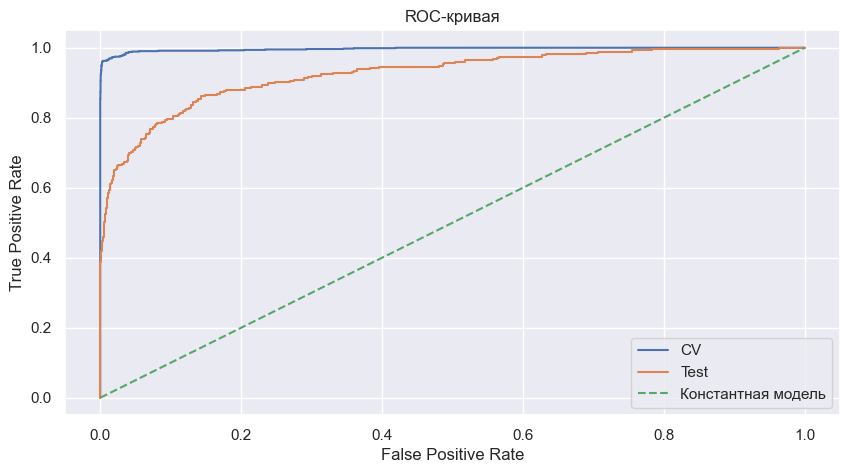


------------------------- Важность признаков CatBoost -------------------------



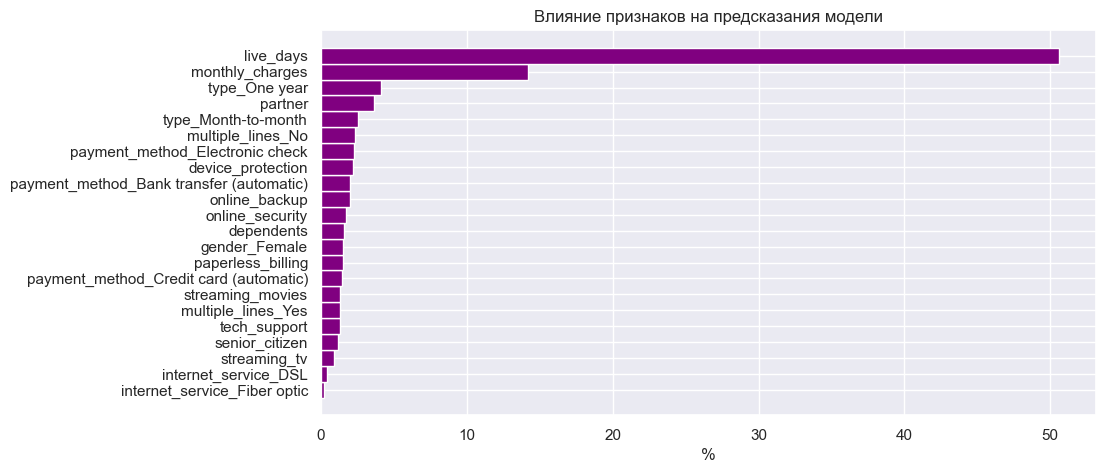

In [37]:
''' Вывод метрик CatBoost '''

#print('-'*25,'Метрики CatBoost','-'*25)
#print()
#metrics_df = pd.DataFrame({
#    'accuracy': [accuracy_score(y, catb_best_model.predict(X)).round(3),
#                 accuracy_score(y_test, catb_best_model.predict(X_test)).round(3)],
#    'precision': [precision_score(y, catb_best_model.predict(X)).round(3),
#                  precision_score(y_test, catb_best_model.predict(X_test)).round(3)],
#    'recall': [recall_score(y, catb_best_model.predict(X)).round(3),
#               recall_score(y_test, catb_best_model.predict(X_test)).round(3)],
#    'f1': [f1_score(y, catb_best_model.predict(X)).round(3),
#           f1_score(y_test, catb_best_model.predict(X_test)).round(3)],
#    'roc-auc': [catb_auc_cv, 
#                roc_auc_score(y_test, catb_best_model.predict_proba(X_test)[:, 1]).round(3)]
#},
#    index=['CatBoost CV', 'CatBoost Test']
#)
#display(metrics_df)
#print()

# Определение метрик для расчета
print('-'*25,'Метрики CatBoost','-'*25)
print()
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Кросс-валидация и получение метрик
cv_results = cross_validate(catb_best_model, X, y, cv=5, scoring=scoring)

# Средние значения метрик на кросс-валидации
cv_accuracy = cv_results['test_accuracy'].mean().round(3)
cv_precision = cv_results['test_precision'].mean().round(3)
cv_recall = cv_results['test_recall'].mean().round(3)
cv_f1 = cv_results['test_f1'].mean().round(3)
cv_roc_auc = cv_results['test_roc_auc'].mean().round(3)

# Метрики на тестовой выборке
test_accuracy = accuracy_score(y_test, catb_best_model.predict(X_test)).round(3)
test_precision = precision_score(y_test, catb_best_model.predict(X_test)).round(3)
test_recall = recall_score(y_test, catb_best_model.predict(X_test)).round(3)
test_f1 = f1_score(y_test, catb_best_model.predict(X_test)).round(3)
test_roc_auc = roc_auc_score(y_test, catb_best_model.predict_proba(X_test)[:, 1]).round(3)

# Вывод метрик
metrics_df = pd.DataFrame({
    'accuracy': [cv_accuracy, test_accuracy],
    'precision': [cv_precision, test_precision],
    'recall': [cv_recall, test_recall],
    'f1': [cv_f1, test_f1],
    'roc-auc': [cv_roc_auc, test_roc_auc]
},
    index=['CatBoost CV', 'CatBoost Test']
)
display(metrics_df)
print()

''' Отчет о классификации '''

print('-' * 25, 'Отчет о классификации', '-' * 25)
print()
print(classification_report(y_test, catb_best_model.predict(X_test), target_names=['Left_0', 'Left_1']))
print()

''' График ROC-кривой для CV и TEST '''

print('-' * 25, 'График ROC-кривой CatBoost', '-' * 25)
print()
plt.figure(figsize=(10, 5))

def visual_roc_curve(title, best_model, X_set, y_set):
    probabilities = best_model.predict_proba(X_set)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_set, probabilities)
    plt.plot(fpr, tpr, label=title)

visual_roc_curve('CV', catb_best_model, X, y)
visual_roc_curve('Test', catb_best_model, X_test, y_test)

plt.plot([0, 1], [0, 1], linestyle='--', label='Константная модель')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()
print()

''' График важности признаков CatBoost '''

print('-' * 25, 'Важность признаков CatBoost', '-' * 25)
print()
catb = CatBoostClassifier(cat_features=cat,
                          eval_metric='AUC',
                          verbose=False,
                          random_state=140823,
                          iterations=900,
                          depth=5,
                          learning_rate=0.1).fit(X, y)

feature_sort = catb.get_feature_importance().argsort()
plt.figure(figsize=(10, 5))
plt.barh(X.columns[feature_sort], catb.get_feature_importance()[feature_sort], height=1, color='purple')
plt.title('Влияние признаков на предсказания модели')
plt.xlabel('%')
plt.show()

## Вывод по проекту

В рамках проекта оператора связи "Ниединогоразрыва.ком" была разработана модель прогнозирования оттока клиентов. Целью проекта было создание прототипа модели, которая бы могла предсказывать уход клиентов, чтобы оператор мог предложить им специальные условия и промокоды для удержания.

В начале проекта был проведен первичный анализ данных, проверена их корректность, а также выявлены некоторые проблемы, включая неправильный тип данных в одном из признаков. Затем были проведены исследовательский анализ данных и их предобработка. В процессе предобработки был устранен технический баг, созданы целевой и дополнительные признаки, проанализированы взаимосвязи в данных и удалены неинформативные признаки. Все данные были объединены в одну таблицу, и был построен график корреляций.

Далее данные были готовы к обучению модели. Для этого было выбрано четыре модели: стандартная модель, линейная модель и две модели бустинга. Результаты показали, что модели бустинга демонстрируют наилучшие показатели на обучающих данных. Лучшая модель была протестирована на тестовых данных, и достигнуты высокие показатели предсказания по заданной метрике.

Финальная модель обладает хорошей способностью к прогнозированию и показывает высокое качество предсказания оттока клиентов. График "Влияние признаков на предсказания модели" демонстрирует важность признаков для целевого признака, где видно, что наибольшее влияние на отток оказывают "срок жизни" клиента, ежемесячные траты, общие траты, тип подписки и способ оплаты счета, в то время как остальные признаки имеют меньшее влияние.

**Цель проекта была достигнута - построение прототипа модели машинного обучения для прогнозирования оттока клиентов.**

## Отчет по проекту

В ходе работы над проектом была проведена детальная проверка каждой из 4 таблиц в ***первичном анализе данных***, включающая информацию о признаках, размере таблицы, количестве пропусков и дубликатов, а также уникальные значения каждого признака. В результате было выявлено, что таблицы имеют разные размеры, что указывает на возможное наличие пропусков при их объединении. Однако в каждой таблице не было обнаружено пропусков или дубликатов. Также было обнаружено, что некоторые признаки имеют некорректный тип данных, что может затруднить их последующую обработку и анализ. Таким образом, первичный анализ данных позволил получить общее представление о предоставленных таблицах, выявить потенциальные проблемы с пропусками и типами данных.

Следующим этапом работы над проектом было выполнение ***предобработки и исследовательского анализа данных***. Эти два этапа были объединены в один, так как основная информация содержалась в таблице "contract", и большая часть работ была сосредоточена именно здесь. Анализ проводился последовательно по порядку следования признаков, чтобы избежать ошибок и путаницы.

В начале было проверено количество уникальных значений идентификаторов клиентов, чтобы исключить наличие неявных дубликатов. Затем тип данных признака `total_charges` был изменен с строкового на числовой, предварительно удалив объекты с пустыми значениями данного признака. Признаки `begin_date` и `end_date` были приведены к временному типу для создания целевого признака `left`, который представляет собой количество дней, проведенных клиентом в компании. Значения `No` в признаке `end_date` (клиент продолжает пользоваться услугами компании) были заменены на дату 01-02-2016, которая соответствует дате выгрузки данных. Кроме того, был сгенерирован признак `live_days` на основе временных признаков, после чего они были удалены, чтобы избежать корреляции с новым признаком.

Затем был проведен промежуточный исследовательский анализ численных признаков `total_charges` и `monthly_charges` для описания обнаруженных закономерностей и распределений в ценовых диапазонах. После завершения работы с основной таблицей было выполнено объединение таблиц, а отсутствующие значения были заполнены меткой `notused`, указывающей отсутствие услуги у клиента. Для удобства подготовки данных категориальные признаки были преобразованы в числовые значения 0 и 1 с помощью бинарной маски.

Далее были построены графики для численных и категориальных признаков, чтобы описать поведение клиентов в разных группах - оставшихся и ушедших. Был также построен график дисбаланса классов, который показал соотношение классов 1 к 3. Было принято решение использовать веса классов с помощью параметра `class_weight` для линейных моделей в гиперпараметрах. В конце были построены графики корреляций, на основании которых признак `total_charges` был удален из-за его высокой корреляции с другими численными признаками. Категориальные признаки с высокой корреляцией были оставлены, и их значимость будет проверена на лучшей модели. Предобработка и исследовательский анализ данных были успешно завершены.

В следующем этапе проекта была выполнена ***подготовка данных к обучению***. Признаки с типом данных `object` были приведены к типу `category` для обеспечения корректной работы моделей градиентного бустинга. Данные были разделены на обучающую `train` и тестовую `test` выборки в соотношении `75:25`. Значение переменной `random_state` было установлено равным `140823`. Целевой признак был стратифицирован, и было проверено распределение объектов разных классов по целевому признаку на обучающей и тестовой выборках.

Для обучения моделей был предусмотрен пайплайн, в котором был создан трансформер для кодирования `OneHotEncoder - OHE` и масштабирования `StandardScaler - SS` признаков. Для "деревянных" моделей использовалось только кодирование `OHE`, в то время как для линейных моделей применялись и кодирование `OHE`, и масштабирование `SS`. В обучении участвовали все признаки, включая числовые признаки `monthly_charges` и категориальные признаки `type`, `gender`, `payment_method`, `internet_service`, а также оставшиеся бинарные категориальные признаки.

В заключение этого этапа была объявлена функция, которая принимает название модели и её параметры в качестве входных данных и возвращает значения указанной метрики, лучшие параметры модели и лучшую модель на основе кросс-валидации. Эта функция будет использоваться в дальнейшем для оценки и выбора наилучшей модели.

На следующем этапе ***обучения моделей*** были обучены четыре модели: LogisticRegression, Random Forest, LGBM и CatBoost. Для каждой модели был выполнен перебор по сетке параметров с целью определения наилучших значений. По окончании работы функции с кросс-валидацией было выявлено, что лучшие результаты по метрике достигла модель CatBoost:

 - *CatBoost с гиперпараметрами eval_metric ='AUC', verbose = False, random_state = 140823, iterations = 900, depth = 5, learning_rate = 0.1*

На заключительном этапе проекта было проведено ***тестирование*** лучшей модели, которая была выбрана после обучения и кросс-валидации. Была оценена производительность модели на тестовой выборке, чтобы оценить ее точность и способность обобщать данные.

Для визуализации результатов был построен график `ROC-кривой (Receiver Operating Characteristic)`, который позволяет оценить качество классификации модели в зависимости от выбранного порога отсечения. Также была проанализирована важность признаков, которая позволяет определить, какие признаки оказывают наибольшее влияние на предсказания модели.

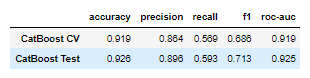

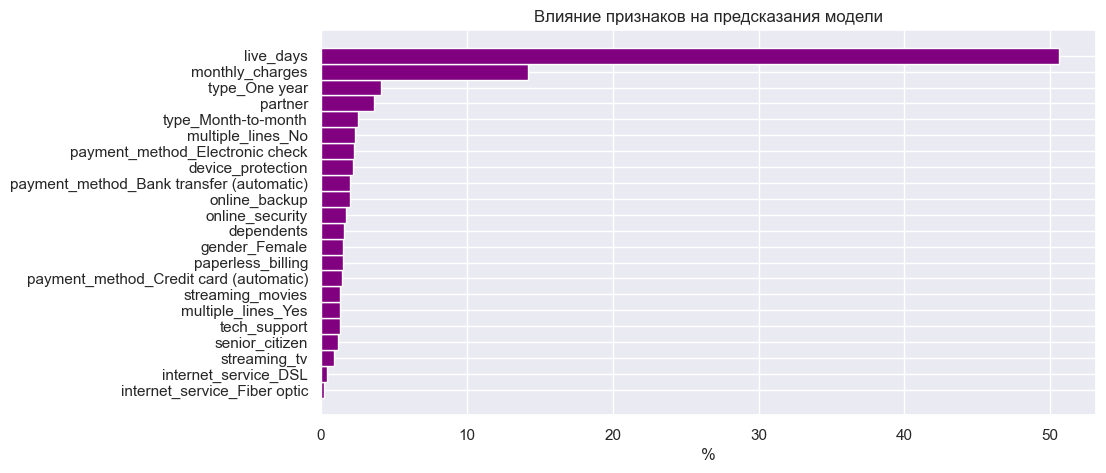

Лучшая модель, выбранная на основе обучения и кросс-валидации, продемонстрировала высокое значение метрики на тестовой выборке, равное 0.925. Для более полного анализа полученных результатов были рассчитаны дополнительные метрики, такие как `precision`, `recall`, `F1-мера` и `accuracy`.

Значение `recall` указывает на то, что модель распознает 59.3% ушедших клиентов среди всех действительно ушедших клиентов. `Precision`, в свою очередь, показывает, что модель правильно классифицирует 89.6% ушедших клиентов среди всех клиентов. `F1-мера` является среднегармоническим между `precision` и `recall` и позволяет оценить баланс между ними, не зависящий от дисбаланса классов.

Также была рассчитана метрика `ROC-AUC`, которая представляет собой среднегармоническое между показателями истинно положительных результатов (TPR) и ложноположительных результатов (FPR). Значение `ROC-AUC` составило 92.5%, что говорит о высокой производительности модели в классификации.

В ходе выполнения проекта не возникло затруднений, так как хорошо продуманный и подробный план является гарантией успешного выполнения проекта. Все этапы проекта оказались важными, так как некорректная работа хотя бы одного из них могла привести к сбою или низкому значению метрики. 

Проект успешно завершен.